# Capstone - Testing & Modeling

## Brooke Nichols

I'm going to first look at the general correlation of the feature variables against what will be the target variable, magnitude, to see if any of the features stick out. I will be running a stats model linear regression to pull out the coefficients and p-values to look for further statistical connection between the features and the target. Since the data for the target variable in this dataset is continuous I will be using a linear regression model to predict possible seismic activity around fracking oil wells in the Permian Basin. 

In [1]:
#bring in packages necessary to run this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
#read in cleaned data
master = pd.read_csv('data/Master/master.csv', index_col = 0)
master

,EventDate,EventTime,SeisLatitude,SeisLongitude,Magnitude,JobStartDate,JobEndDate,APINumber,WellName,OperatorName,FracLatitude,FracLongitude,CountyName,TVD,TotalBaseWaterVolume,TotalBaseNonWaterVolume,FederalWell,IngredientName,PercentHFJob,MassIngredient
0,2020-09-10,03:29:25,31.6568,-104.3178,3.1,2020-08-07,2020-09-10,42301347900000,Roosterfish 53-2-43 LOV Unit 8H,Shell Oil Company affiliate,31.788461,-103.594571,Loving,11479.0,8455038.0,0.0,0,water,79.414839,7.051502e+07
1,2020-09-10,03:29:25,31.6568,-104.3178,3.1,2020-08-07,2020-09-10,42301347900000,Roosterfish 53-2-43 LOV Unit 8H,Shell Oil Company affiliate,31.788461,-103.594571,Loving,11479.0,8455038.0,0.0,0,glutaraldehyde,0.002363,2.097827e+03
2,2020-09-10,03:29:25,31.6568,-104.3178,3.1,2020-08-07,2020-09-10,42301347900000,Roosterfish 53-2-43 LOV Unit 8H,Shell Oil Company affiliate,31.788461,-103.594571,Loving,11479.0,8455038.0,0.0,0,formic acid,0.000004,3.786360e+00
3,2020-09-10,03:29:25,31.6568,-104.3178,3.1,2020-08-07,2020-09-10,42301347900000,Roosterfish 53-2-43 LOV Unit 8H,Shell Oil Company affiliate,31.788461,-103.594571,Loving,11479.0,8455038.0,0.0,0,cinnamaldehyde,0.000004,3.915100e+00
4,2020-09-10,03:29:25,31.6568,-104.3178,3.1,2020-08-07,2020-09-10,42301347900000,Roosterfish 53-2-43 LOV Unit 8H,Shell Oil Company affiliate,31.788461,-103.594571,Loving,11479.0,8455038.0,0.0,0,ethylene glycol,0.000012,1.082899e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430495,2016-02-20,07:53:53,31.2258,-103.3279,3.3,2016-01-04,2018-01-20,42389360250000,FRIO STATE UNIT 221-222W 1H,Primexx Operating Corporation,31.039300,-103.579921,Reeves,9922.0,24410160.0,0.0,0,methanol,0.013327,3.058400e+04
430496,2016-02-20,07:53:53,31.2258,-103.3279,3.3,2016-01-04,2018-01-20,42389360250000,FRIO STATE UNIT 221-222W 1H,Primexx Operating Corporation,31.039300,-103.579921,Reeves,9922.0,24410160.0,0.0,0,ethanol,0.074920,1.719280e+05
430497,2016-02-20,07:53:53,31.2258,-103.3279,3.3,2016-01-04,2018-01-20,42389360250000,FRIO STATE UNIT 221-222W 1H,Primexx Operating Corporation,31.039300,-103.579921,Reeves,9922.0,24410160.0,0.0,0,hydrochloric acid,0.255589,5.865300e+05
430498,2016-02-20,07:53:53,31.2258,-103.3279,3.3,2016-01-04,2018-01-20,42389360250000,FRIO STATE UNIT 221-222W 1H,Primexx Operating Corporation,31.039300,-103.579921,Reeves,9922.0,24410160.0,0.0,0,water,0.933877,2.143087e+06


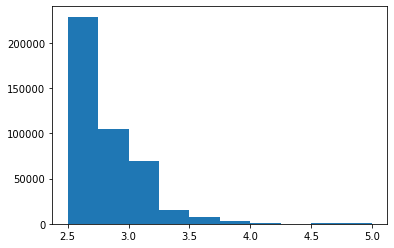

In [3]:
#distribution of target variable
plt.figure()
plt.hist(master['Magnitude'])
plt.show()

Since my target variable distribution is skewed I will transform it using log to see how it effects my modeling.  

In [4]:
#create a log target variable
master['LogMag'] = np.log(master['Magnitude'])

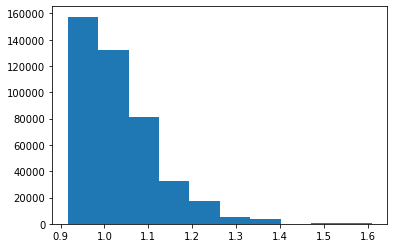

In [5]:
#check the new target distribution
plt.figure()
plt.hist(master['LogMag'])
plt.show()

In [6]:
#view master info
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430500 entries, 0 to 430499
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   EventDate                430500 non-null  object 
 1   EventTime                430500 non-null  object 
 2   SeisLatitude             430500 non-null  float64
 3   SeisLongitude            430500 non-null  float64
 4   Magnitude                430500 non-null  float64
 5   JobStartDate             430500 non-null  object 
 6   JobEndDate               430500 non-null  object 
 7   APINumber                430500 non-null  int64  
 8   WellName                 430500 non-null  object 
 9   OperatorName             430500 non-null  object 
 10  FracLatitude             430500 non-null  float64
 11  FracLongitude            430500 non-null  float64
 12  CountyName               430500 non-null  object 
 13  TVD                      430500 non-null  float64
 14  Tota

In [7]:
#make dataframe that will be used for modeling
model = master[['Magnitude', 'LogMag', 'TVD', 'FederalWell', 'TotalBaseWaterVolume', 'TotalBaseNonWaterVolume',
                    'IngredientName', 'PercentHFJob', 'MassIngredient']]

In [8]:
#view model info
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430500 entries, 0 to 430499
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Magnitude                430500 non-null  float64
 1   LogMag                   430500 non-null  float64
 2   TVD                      430500 non-null  float64
 3   FederalWell              430500 non-null  int64  
 4   TotalBaseWaterVolume     430500 non-null  float64
 5   TotalBaseNonWaterVolume  430500 non-null  float64
 6   IngredientName           430500 non-null  object 
 7   PercentHFJob             430500 non-null  float64
 8   MassIngredient           430500 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 32.8+ MB


In [9]:
#set correlation for dataframes
mcorr = model.corr()

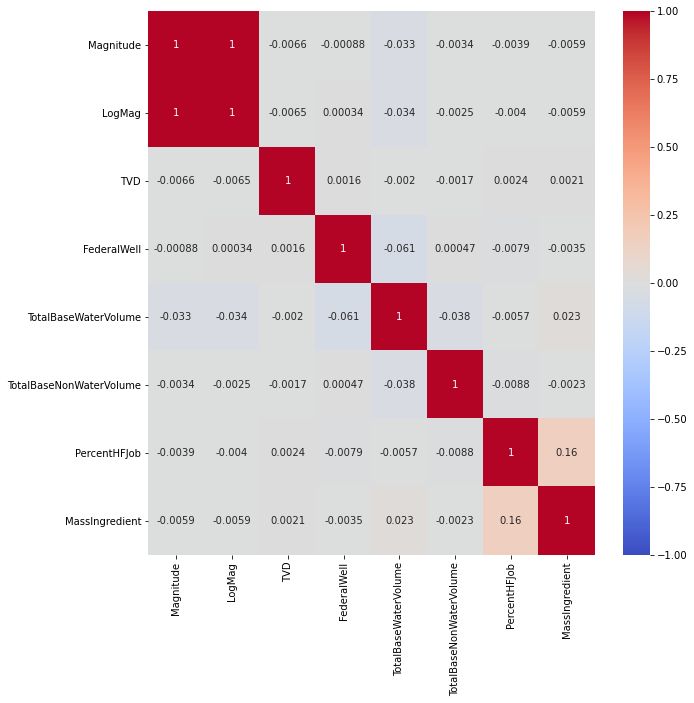

In [10]:
#check correlations for model
plt.figure(figsize=(10,10))
sns.heatmap(mcorr, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)
plt.show()

Looking at the correlations for the unscaled dataset it does not appear that there is a high correlation between fracking wells and any seismic activity that occurs around them during the fracking period.

I'm going to run a stats model linear regression on scaled data to get a look at the correlation coefficients and p-values to see if there is any significance between my feature variables and my target and my transformed target. 

# Stats Models

In [11]:
#set up feature and target variables for data frames
Xm = model.drop(['Magnitude', 'LogMag', 'IngredientName'], axis = 1)

ym = model['Magnitude']

yml = model['LogMag']

In [12]:
#scale the data for the stats models
ssm = StandardScaler()
ssm.fit(Xm)
Xms = ssm.transform(Xm)

In [13]:
#add constants to the X
Xms = sm.add_constant(Xms)

In [14]:
#instantiate, fit and summarize the chemicals data
model_linear = sm.OLS(ym, Xms)

model_linear_results = model_linear.fit()

model_linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Magnitude   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     86.61
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          5.62e-109
Time:                        21:27:24   Log-Likelihood:                -55669.
No. Observations:              430500   AIC:                         1.114e+05
Df Residuals:                  430493   BIC:                         1.114e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7904      0.000   6648.608      0.000       2.790       2.791
x1            -0.0018      0.000     -4.353      0.000      -0.003      -0.001
x2            -0.0008      0.000     -1.931      0.053      -0.002    1.22e-05
x3            -0.0092      0.000    -21.836      0.000      -0.010      -0.008
x4            -0.0013      0.000     -3.087      0.002      -0.002      -0.000
x5            -0.0009      0.000     -2.187      0.029      -0.002   -9.65e-05
x6            -0.0013      0.000     -2.983      0.003      -0.002      -0.000
==============================================================================
Omnibus:                   172145.169   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005543.138
Skew:                           1.837   Prob(JB):                         0.00
Kurtosis:                       9.524   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#get model columns
Xm.columns

Index(['TVD', 'FederalWell', 'TotalBaseWaterVolume', 'TotalBaseNonWaterVolume',
       'PercentHFJob', 'MassIngredient'],
      dtype='object')

After running the stats linear regression model on the scaled model dataframe there are no correlation coefficients that are significant. The only p-value that is high, above the .05 significance threshold, is the FederalWell status. This model does not explain y variance very well either, still only ~1%.

In [16]:
#instantiate, fit and summarize the model data for log magnitude
model_linear_log = sm.OLS(yml, Xms)

model_linear_log_results = model_linear_log.fit()

model_linear_log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LogMag   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     88.60
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          1.52e-111
Time:                        21:27:24   Log-Likelihood:             4.1485e+05
No. Observations:              430500   AIC:                        -8.297e+05
Df Residuals:                  430493   BIC:                        -8.296e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0217      0.000   7262.219      0.000       1.021       1.022
x1            -0.0006      0.000     -4.330      0.000      -0.001      -0.000
x2            -0.0002      0.000     -1.151      0.250      -0.000       0.000
x3            -0.0031      0.000    -22.173      0.000      -0.003      -0.003
x4            -0.0004      0.000     -2.497      0.013      -0.001   -7.56e-05
x5            -0.0003      0.000     -2.232      0.026      -0.001   -3.87e-05
x6            -0.0004      0.000     -2.936      0.003      -0.001      -0.000
==============================================================================
Omnibus:                   103640.263   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           268815.968
Skew:                           1.308   Prob(JB):                         0.00
Kurtosis:                       5.853   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#get model columns
Xm.columns

Index(['TVD', 'FederalWell', 'TotalBaseWaterVolume', 'TotalBaseNonWaterVolume',
       'PercentHFJob', 'MassIngredient'],
      dtype='object')

After running the stats linear regression model on the scaled model dataframe and the log target variable there are still no correlation coefficients that are positively significant. The only p-value that is high, above the .05 significance threshold, is still the FederalWell status. The explanation of the y-variance from the R^2 score did not change.

Transforming the target variable with the log did not change the outcomes much. When I run the rest of my models for prediction since the FederalWell status has a high p-value I will drop it from the rest of my modeling. Since the p-values for everything else seem to below the threshold for significance I will continue modeling with them when I get to the scikit models. To see if one of the features is more predictive than the others(the only one that is predicitive) I'm going to test them one by one against the target using the model data. 

In [18]:
#set single Xs
Xmt = model['TVD']

Xmw = model['TotalBaseWaterVolume']

Xmn = model['TotalBaseNonWaterVolume']

Xmp = model['PercentHFJob']

Xmm = model['MassIngredient']

In [19]:
#add constants to the Xs
Xmt = sm.add_constant(Xmt)

Xmw = sm.add_constant(Xmw)

Xmn = sm.add_constant(Xmn)

Xmp = sm.add_constant(Xmp)

Xmm = sm.add_constant(Xmm)

In [20]:
#instantiate, fit and summarize the TVD
tvd_linear = sm.OLS(ym, Xmt)

tvd_linear_results = tvd_linear.fit()

tvd_linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Magnitude   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     18.63
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           1.58e-05
Time:                        21:27:25   Log-Likelihood:                -55919.
No. Observations:              430500   AIC:                         1.118e+05
Df Residuals:                  430498   BIC:                         1.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7927      0.001   4182.363      0.000       2.791       2.794
TVD        -2.155e-07   4.99e-08     -4.317      0.000   -3.13e-07   -1.18e-07
==============================================================================
Omnibus:                   172220.367   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004800.242
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                       9.519   Cond. No.                     2.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#instantiate, fit and summarize the TotalBaseWaterVolume
tbwv_linear = sm.OLS(ym, Xmw)

tbwv_linear_results = tbwv_linear.fit()

tbwv_linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Magnitude   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     471.4
Date:                Sat, 31 Oct 2020   Prob (F-statistic):          1.83e-104
Time:                        21:27:25   Log-Likelihood:                -55693.
No. Observations:              430500   AIC:                         1.114e+05
Df Residuals:                  430498   BIC:                         1.114e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.8078      0.001   3100.365      0.000       2.806       2.810
TotalBaseWaterVolume -9.715e-10   4.47e-11    -21.711      0.000   -1.06e-09   -8.84e-10
==============================================================================
Omnibus:                   172216.450   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1006153.203
Skew:                           1.838   Prob(JB):                         0.00
Kurtosis:                       9.525   Cond. No.                     4.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#instantiate, fit and summarize the TotalBaseNonWaterVolume
tbnwv_linear = sm.OLS(ym, Xmn)

tbnwv_linear_results = tbnwv_linear.fit()

tbnwv_linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Magnitude   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.956
Date:                Sat, 31 Oct 2020   Prob (F-statistic):             0.0260
Time:                        21:27:26   Log-Likelihood:                -55926.
No. Observations:              430500   AIC:                         1.119e+05
Df Residuals:                  430498   BIC:                         1.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.7905      0.000   6628.228      0.000       2.790       2.791
TotalBaseNonWaterVolume -1.217e-09   5.47e-10     -2.226      0.026   -2.29e-09   -1.46e-10
==============================================================================
Omnibus:                   172210.343   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004561.028
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                       9.518   Cond. No.                     7.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#instantiate, fit and summarize the PercentHFJob
phfj_linear = sm.OLS(ym, Xmp)

phfj_linear_results = phfj_linear.fit()

phfj_linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Magnitude   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.519
Date:                Sat, 31 Oct 2020   Prob (F-statistic):             0.0107
Time:                        21:27:26   Log-Likelihood:                -55925.
No. Observations:              430500   AIC:                         1.119e+05
Df Residuals:                  430498   BIC:                         1.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.7907      0.000   6362.730      0.000       2.790       2.792
PercentHFJob -4.626e-05   1.81e-05     -2.553      0.011   -8.18e-05   -1.07e-05
==============================================================================
Omnibus:                   172233.687   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004890.492
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                       9.519   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#instantiate, fit and summarize the MassIngredient
mi_linear = sm.OLS(ym, Xmm)

mi_linear_results = mi_linear.fit()

mi_linear_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Magnitude   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.07
Date:                Sat, 31 Oct 2020   Prob (F-statistic):           0.000103
Time:                        21:27:27   Log-Likelihood:                -55921.
No. Observations:              430500   AIC:                         1.118e+05
Df Residuals:                  430498   BIC:                         1.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7905      0.000   6637.733      0.000       2.790       2.791
MassIngredient -3.057e-12   7.87e-13     -3.882      0.000    -4.6e-12   -1.51e-12
==============================================================================
Omnibus:                   172220.781   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1004674.413
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                       9.518   Cond. No.                     5.34e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After running the feature variables separately against target it would appear the feature that matters the most is the  TotalBaseWaterVolume, which is the total gallons of water pumped down the well in the carrier fluid during the frac job. 

# Scikit Models

I'm going to use some regression models from scikit learn, since my target is a continous variable, to look at other predictive models.

In [25]:
#set X and y for modeling
X = model.drop(['Magnitude', 'LogMag', 'FederalWell'], axis = 1)

y = model['Magnitude']

I have only done one split here since I will be running a grid search. During the grid search a validation set is automatically created as needed. I will one hot encode my categorical column, IngredientName, to prevent bias and leakage after the split. After OHE I will drop the original IngredientName column. 

In [26]:
#train/validation split target magnitude
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 4)

In [27]:
#check shapes
print(X_train.shape)
print(X_test.shape)

(322875, 6)
(107625, 6)


In [28]:
#instantiate the encoder
ohe = OneHotEncoder(sparse = False)
#fit the encoder and transform
IngredientTrain = pd.DataFrame(X_train['IngredientName'])
IngredientTrain = ohe.fit_transform(IngredientTrain)
IngredientTest = pd.DataFrame(X_test['IngredientName'])
IngredientTest = ohe.transform(IngredientTest)

In [29]:
#put dense array into new df and get column names
IngredientTrain = pd.DataFrame(IngredientTrain, columns = (ohe.categories_), dtype = np.int8)

In [30]:
#reset the train index
X_train.reset_index(drop = True, inplace = True)

In [31]:
#put together the train data with the ingredient ohe
X_train = pd.concat([X_train, IngredientTrain], axis = 1).reset_index(drop = True)

In [32]:
#drop the original ingredient column
X_train.drop(['IngredientName'], axis = 1, inplace = True)

In [33]:
#put dense array into new df and get column names
IngredientTest = pd.DataFrame(IngredientTest, columns = (ohe.categories_), dtype = np.int8)

In [34]:
#reset the test index
X_test.reset_index(drop = True, inplace = True)

In [35]:
#put together the test data with the ingredient ohe
X_test = pd.concat([X_test, IngredientTest], axis = 1).reset_index(drop = True)

In [36]:
#drop the original ingredient column
X_test.drop(['IngredientName'], axis = 1, inplace = True)

In order to figure out which non-linear regression model is the best for this set of data I'm going to set up a  pipeline/grid search to go over 2 different models, Ridge Regression and Decision Tree Regressor, and various parameters using 5 folds. 

In [37]:
#set up a pipeline for the grid search to find the best scale and model
estimators = [('scale', StandardScaler()),
             ('model', Ridge())]

pipe = Pipeline(estimators)

In [38]:
#set up the grid
param_grid = [
    {'model': [Ridge()],
    'scale': [StandardScaler()],
    'model__alpha': [0.01, 0.1, 1, 10]},
    {'model': [DecisionTreeRegressor()],
    'scale': [StandardScaler()],
    'model__max_depth': list(range(1,int(np.sqrt(len(X_train))),5))}]

In [39]:
%%time
#create grid and fit
grid = GridSearchCV(pipe, param_grid = param_grid, cv=5, n_jobs=-1, verbose=1)

fitted_grid = grid.fit(X_train, y_train)

Fitting 5 folds for each of 118 candidates, totalling 590 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 590 out of 590 | elapsed: 37.3min finished


CPU times: user 13.7 s, sys: 2.54 s, total: 16.2 s
Wall time: 37min 32s


In [40]:
#check the best model
fitted_grid.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('model', DecisionTreeRegressor(max_depth=16))])

In [41]:
#score the best model
print(fitted_grid.score(X_train,y_train))
print(fitted_grid.score(X_test,y_test))

0.17680959711720157
0.12029069430261297


After testing sci-kit learning models to determine the best non-linear regression model that would fit the data the Decision Tree was found to be the better model. It improved the R^2 score to 12% on the test set, so it can explain the y-variance  a little better than the linear stats model. There is still quite a lot of seismic activity that cannot be explained by these features. They need to be adjusted to get better at predicting the relationship between seismic activity occurring in the area while a well is being fracked.